## 此文件用于分析连接中的密码

**outline**

- 高频出现的弱密码及出处
- 纯数字的模式 
- 特定的键盘输入模式
    - 例如：！、1、修改一个字母

- 设计若干可以归一化的指标，

### 密码分类

```
  22253 123456
   6952 123
   3950 1234
   2957 admin
   2927 12345
   2803 root
   2435 test
   2170 password
   2042 12345678
   2016 1
   1861 toor
   1567 qwerty
   1541 guest
   1446 ubuntu
   1153 111111
   1004 J5cmmu=Kyf0-br8CsW
    878 5nWt3P-fF4WosQm5O
    836 1qaz@WSX
    780 123456789
    711 0
    696 123123
    633 admin123
    626 P@ssw0rd
    594 1qq2w3e4r5t
    588 1234567890
    564 user
    564 123qwe!@#
    503 oracle
    454 abc123
    437 Aa123456
```

在此截取了连接记录中出现次数前 30 的密码，这些密码可以被分为如下几类：

1. 纯数字组合，例如 123456、123、1234、12345、12345678、1、111111、123456789、0、123123、1234567890；
2. 有特定含义的英文单词，例如 admin、root、test、password、guest、ubuntu、user、oracle；
3. 键盘上的特定模式，例如 qwerty、1qaz@WSX、123qwe!@#、1qq2w3e4r5t;
4. 简单英文和数字的组合，例如 admin123、abc123、Aa123456；
5. 对原有常见密码的简单变形，例如 toor、P@ssw0rd；
6. 没有直接意义但是位居前列的 J5cmmu=Kyf0-br8CsW 和 5nWt3P-fF4WosQm5O。

除了高频出现的上述类型密码外，出现次数没有特别多的密码还出现了这些类型：
// TODO 新增的密码 
1. 

// TODO 


### 单个密码出现分布

`123456` 这个密码在记录中出现了 22253 次，占全部记录的 6.22%，接下来我们将展现这个密码的出现规律。

1. 该密码的每日出现次数；
2. 该密码的出现次数占据每日请求次数的比例；

提取数据的脚本：

```shell
$ awk '{if ($6 == "123456") print $1 }' fakessh-filter-empty-password.log | sort | uniq -c >
> extracted/ch2-123456-day-count.log
```

In [1]:
# Common functions

def load_data (filename):
    data = []
    text = []
    with open(filename, encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            t = line.strip().split(" ")
            if len(t) >= 2:
                key, value = int(t[0]), t[1]
                data.append(key)
                text.append(value)
    return data, text

data, text = load_data("dataset/extracted/password-count.log")

print(data[:10])
print(text[:10])

def format_num(n):
    if n >= 10000:
        return f"{n/10000:.1f}w"
    return str(n)

def format_str(s):
    if len(s) > 10:
        return s[:7]+"..."
    return s

[22253, 6952, 3950, 2957, 2927, 2803, 2435, 2170, 2042, 2016]
['123456', '123', '1234', 'admin', '12345', 'root', 'test', 'password', '12345678', '1']


[991, 1461, 1743, 1779, 840, 631, 724, 637, 473, 864, 683, 353, 353, 379, 313, 615, 639, 510, 341, 609, 428, 676, 612, 536, 940, 589, 135, 87, 41, 64, 48, 35, 17, 32, 27, 12, 41, 50, 22, 42, 15, 0, 5, 9, 10, 0, 7, 239, 77, 429, 213, 144, 271, 861, 344, 257]
[0.16644272757809875, 0.13802550779404818, 0.30387029288702927, 0.15464186369958274, 0.08309427243050747, 0.07714879569629539, 0.09870483980913429, 0.07977457733249843, 0.0513795350858136, 0.039315617036767385, 0.023281180761495723, 0.05819320804484009, 0.052655131264916465, 0.05076346102330565, 0.06407369498464688, 0.044079701834862386, 0.06103734836183017, 0.06926524514464213, 0.05910903102790778, 0.07008861779261134, 0.08634254589469437, 0.07550541717859935, 0.03840843479352329, 0.07179212429681221, 0.14392895421834329, 0.08707865168539326, 0.0598404255319149, 0.01563623292595255, 0.006320332973639587, 0.02512760109933255, 0.023054755043227664, 0.0425273390036452, 0.026813880126182965, 0.028419182948490232, 0.027466937945066123, 

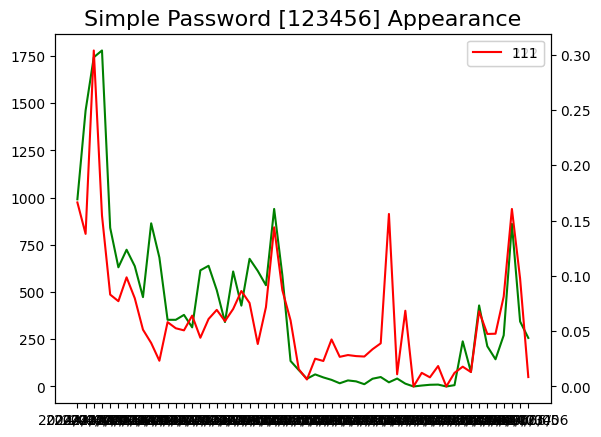

In [24]:
## this is implement for plot simple password [123456] count plot
import matplotlib.pyplot as plt
import math


def plot_simple_password_appear():
    
    data_count, text_count = load_data("dataset/extracted/ch2-123456-day-count.log")
    count_map = {}
    for i in range(len(text_count)):
        count_map[text_count[i]] = data_count[i]

    data_total, text_total = load_data("dataset/extracted/day-count.log")

    y1 = [0 for _ in range(len(text_total))] # appearance count
    y2 = [0 for _ in range(len(text_total))] # appear proportion
    for i in range(len(text_total)):
        date = text_total[i]
        appear = 0
        if date in count_map:
            appear = count_map[date]
        y1[i] = appear
        y2[i] = appear/data_total[i]

    print(y1)
    print(y2)
    x = text_total

    ax1 = plt.gca()
    ax1.plot(x, y1, label='222', c='g')

    plt.title("Simple Password [123456] Appearance", fontsize=16)

    ax2 = plt.twinx()
    ax2.plot(x, y2, c='r', label='111')

    # plt.ylim(2, 5)
    # plt.tick_params(bottom=True, top=False, left=False, right=False)
    # plt.grid(True, axis='y')
    # yticks = [2.0, 3.0, 4.0, 5.0]
    # plt.yticks(yticks, tuple([int(10 ** i) for i in yticks]))
    # plt.xticks([])

    # plt.legend(loc=0)
    ax1.legend(loc=0)
    ax2.legend(loc=1)
    
plot_simple_password_appear()
plt.show()